# Importing libraries and Exploring the Dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression  #logistic regresstion model
from sklearn import svm
from sklearn.svm import SVC                    # Support Vector machine mpodel
from sklearn.neighbors import KNeighborsClassifier  #KNN model
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix

In [2]:
column_names = ["pregnancies", "glucose", "bpressure", "skinfold", "insulin", "bmi", "pedigree", "age", "class"]
df=pd.read_csv('data.csv',names=column_names)
df.head()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   bpressure    768 non-null    int64  
 3   skinfold     768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   pedigree     768 non-null    float64
 7   age          768 non-null    int64  
 8   class        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Creating visual methods to analyze the data.

In [4]:
#check the correlation of the data
df.corr()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinfold,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


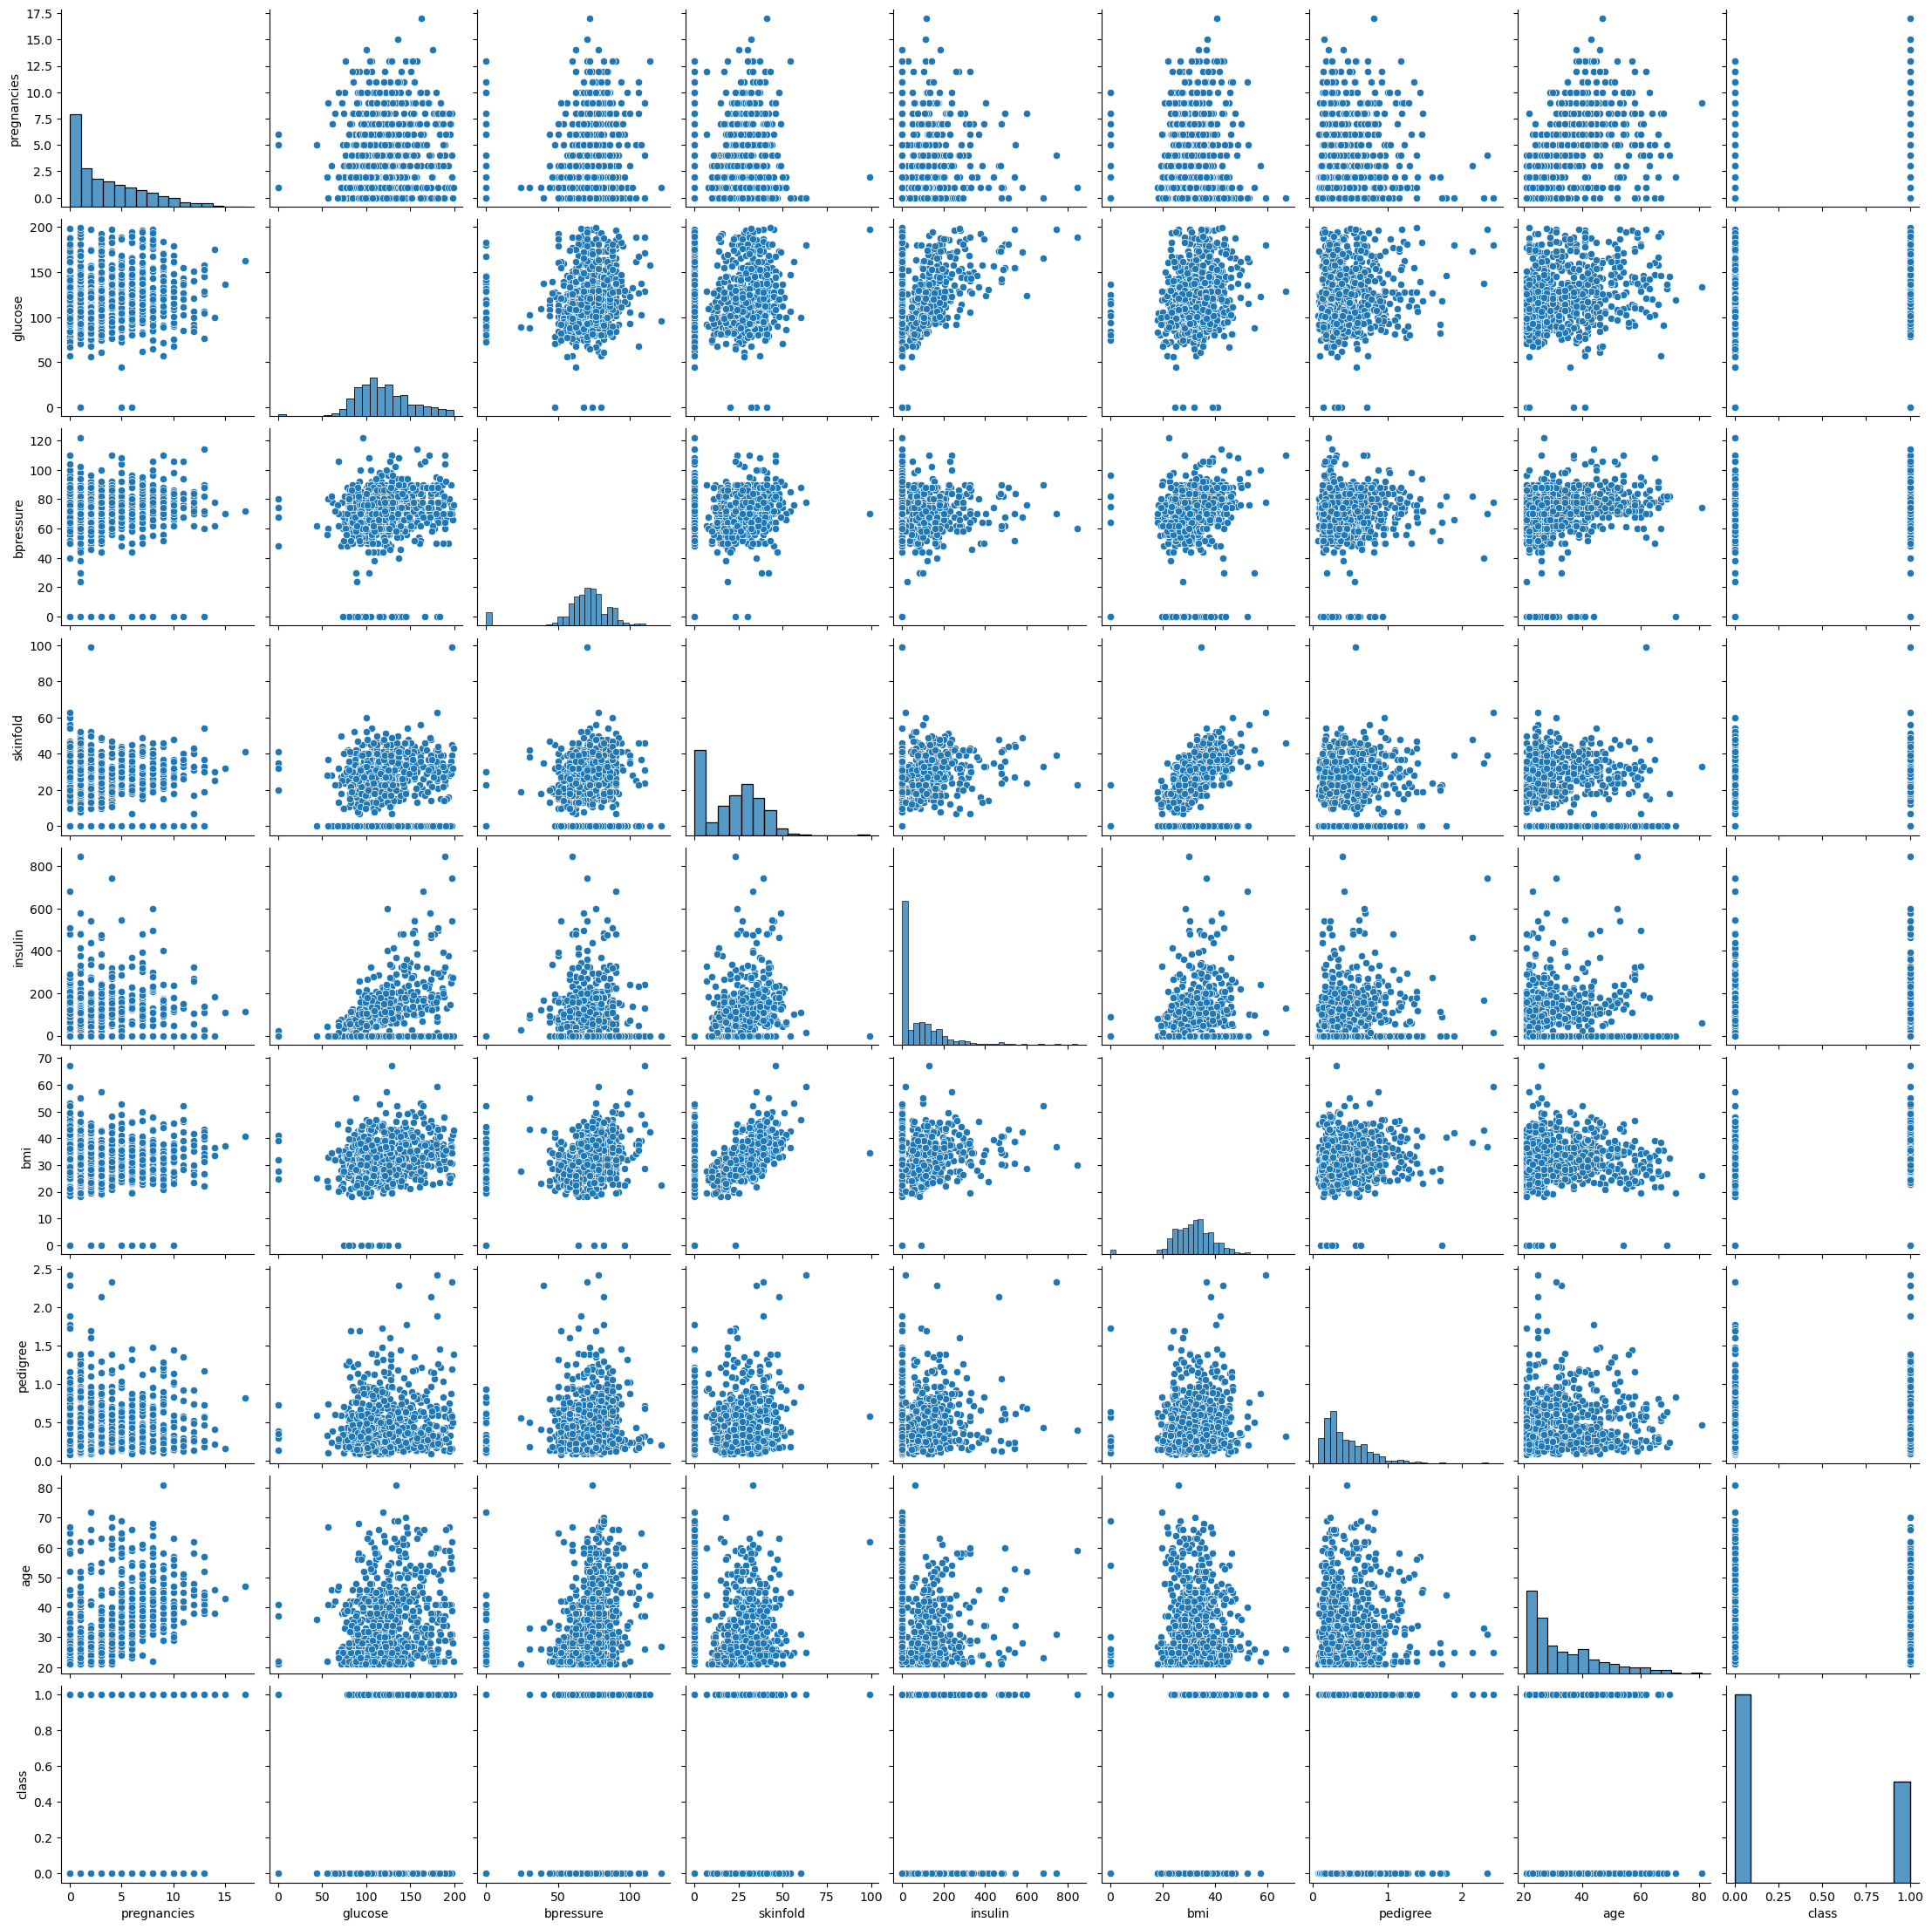

In [5]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'pregnancies'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'bpressure'}>],
       [<AxesSubplot:title={'center':'skinfold'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

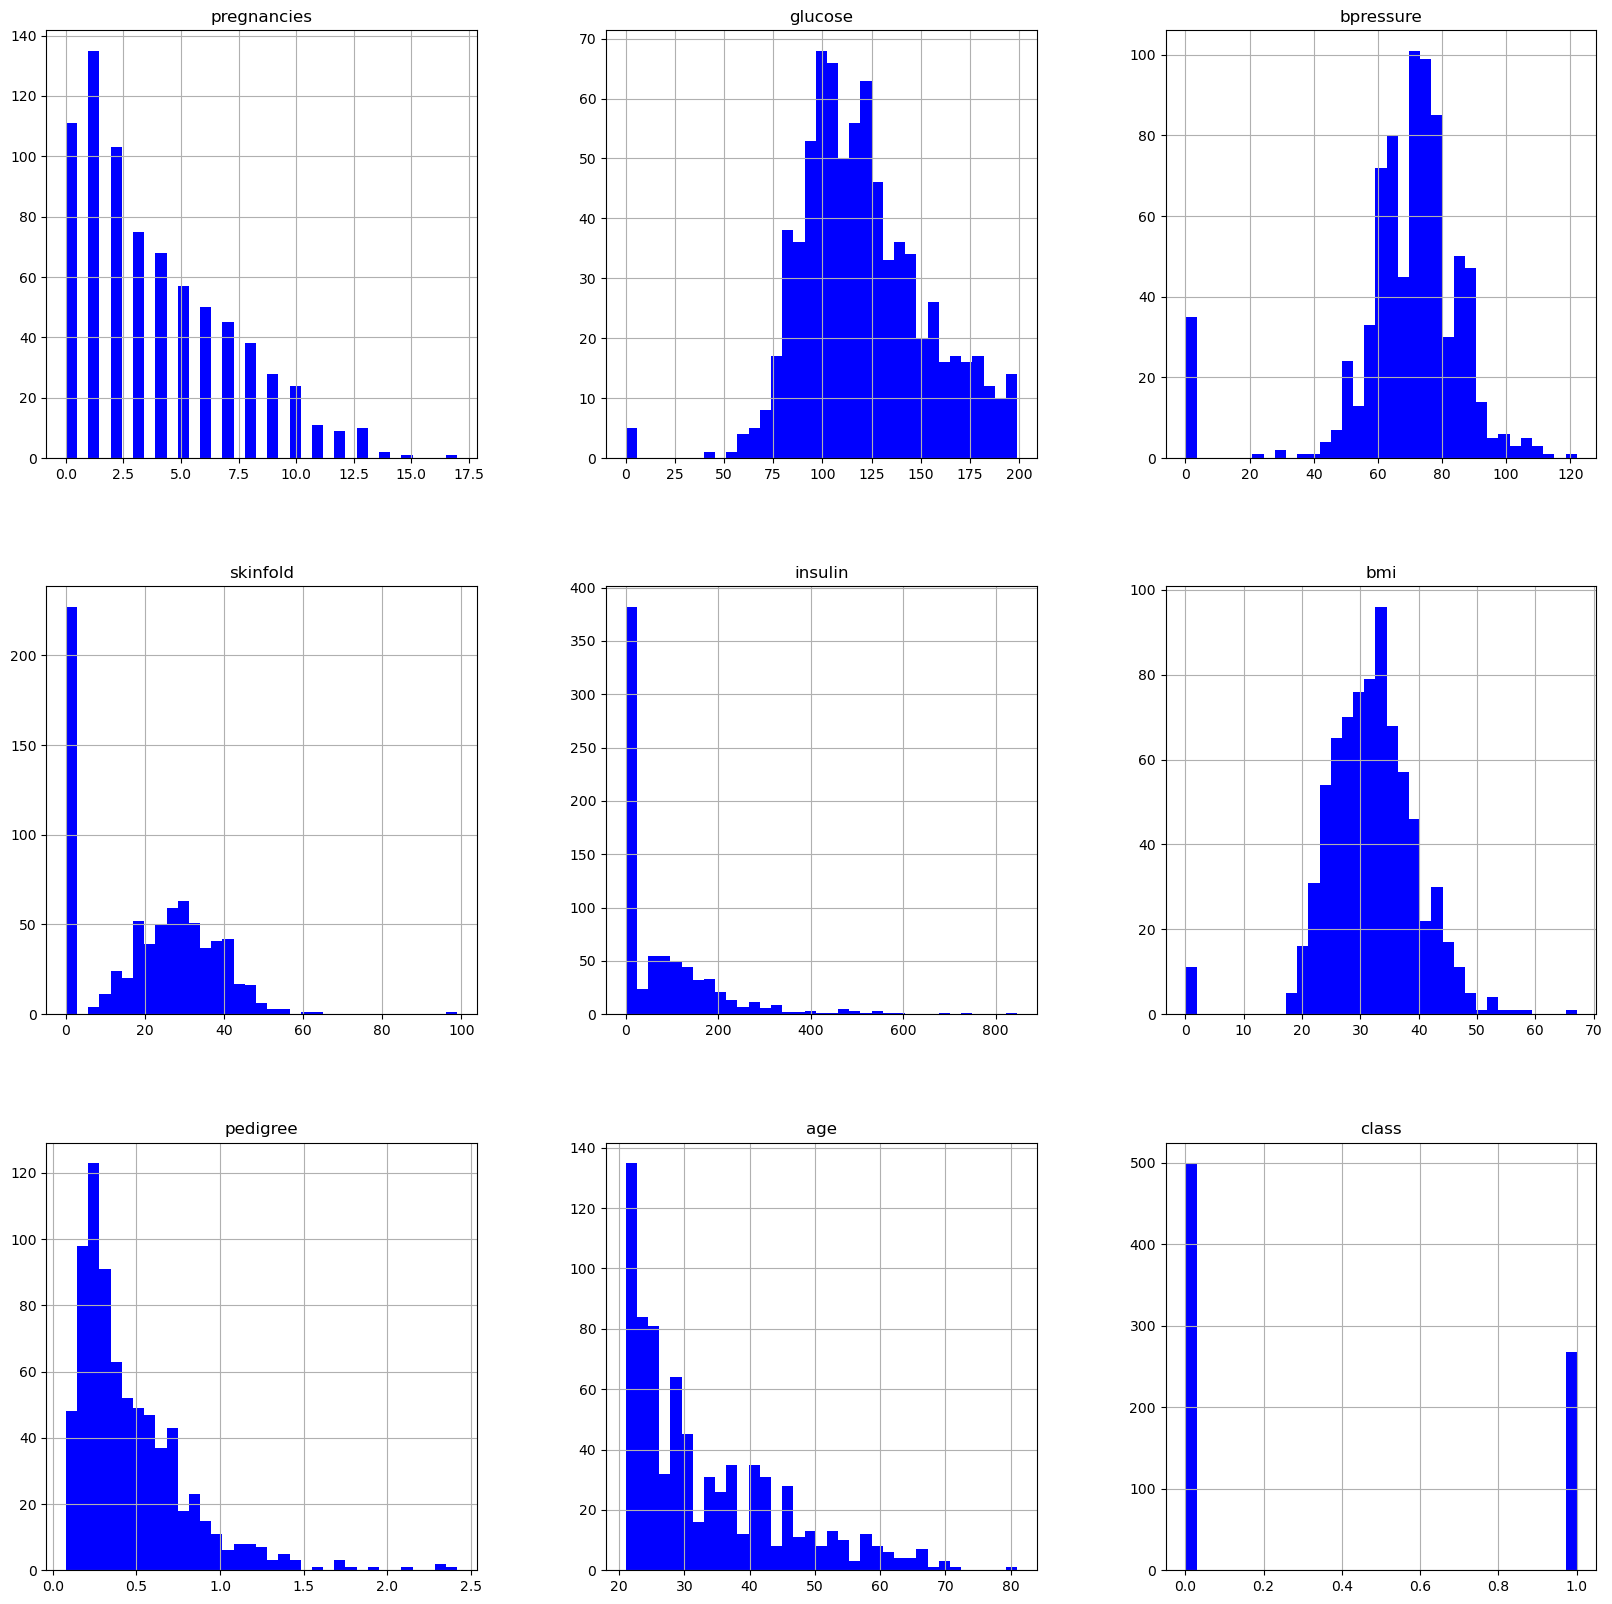

In [6]:
df.hist(bins=35,figsize=(20,20), color='b')

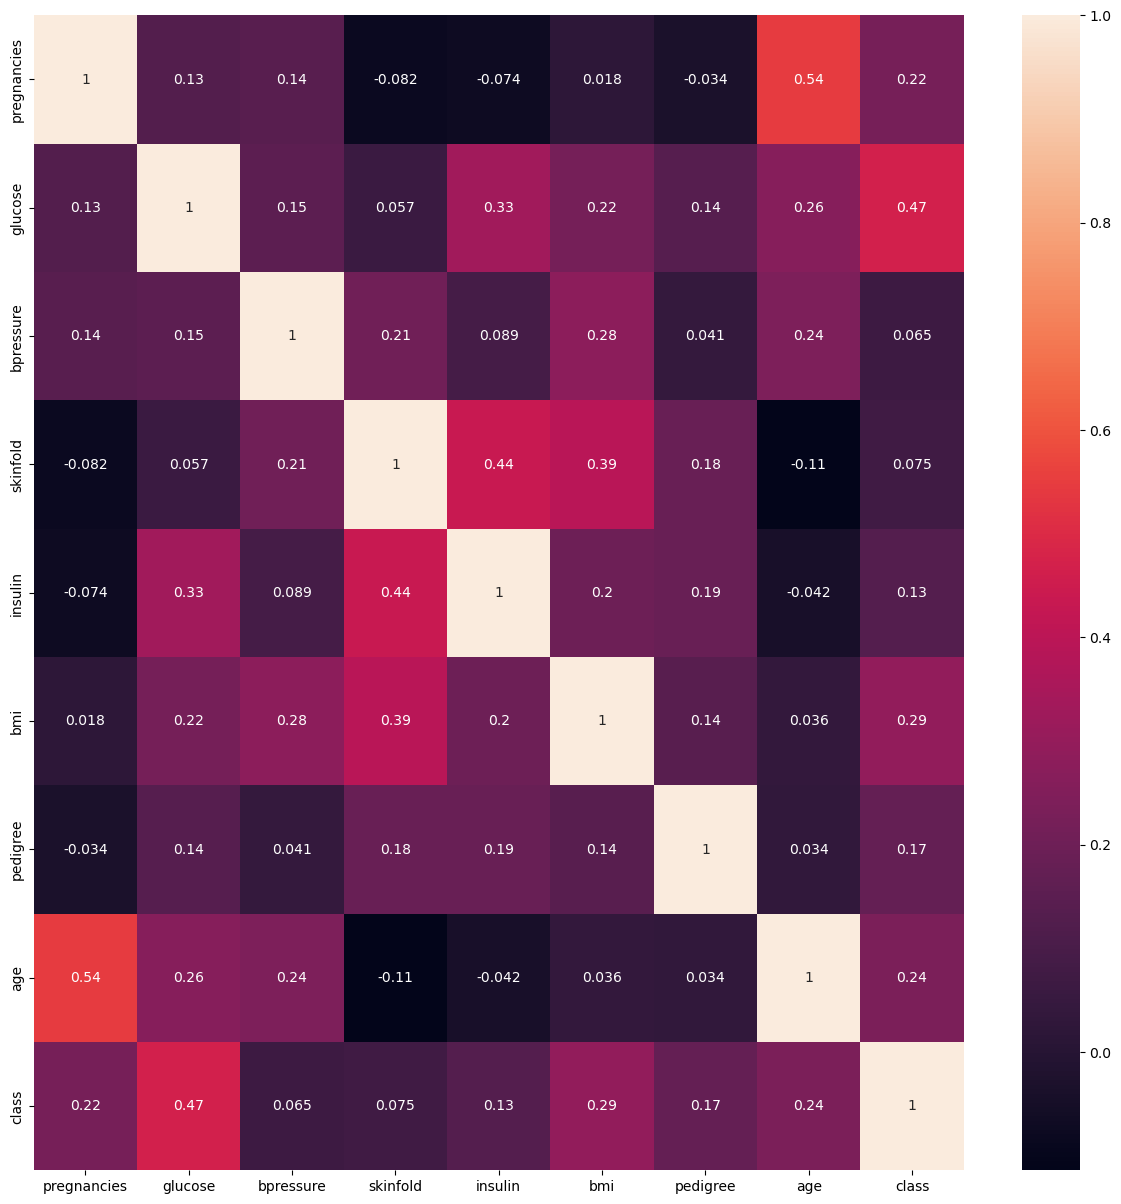

In [7]:
cor=df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(cor,annot=True)
plt.show()

# Make logistic regression model

In [8]:
x=df[["pregnancies", "glucose", "insulin", "bmi", "pedigree", "age", "bpressure", "skinfold"]]

In [9]:
y=df['class']

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 41)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[90,  9],
       [25, 30]], dtype=int64)

In [15]:
acc=accuracy_score(y_test, y_pred)
acc

0.7792207792207793

In [16]:
cr=classification_report(y_test, y_pred)

In [17]:
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [18]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of logistic model: ',acc *100,'%')

Accurcy of logistic model:  77.92207792207793 %


# Make Support vector machine classification model

In [19]:
for k in ('linear','poly','rbf','sigmoid'):
    clf=SVC(kernel=k)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_train)
    print(k)
    print(accuracy_score(y_train,y_pred))

linear
0.7736156351791531
poly
0.7996742671009772
rbf
0.8192182410423453
sigmoid
0.6710097719869706


In [20]:
from sklearn.model_selection import GridSearchCV  #use GridSearchCV to improve the accuracy of our model.
# defining parameter range 
param_grid = {'C': [0.01, 1, 10, 100],  
              'gamma': [10,1,0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True,verbose = 5,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(x_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_train) 
   
# print classification report 
print(classification_report(y_train, grid_predictions)) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       401
           1       0.75      0.52      0.61       213

    accuracy                           0.77       614
   macro avg       0.77      0.71      0.73       614
weighted avg       0.77      0.77      0.76       614



In [58]:
clf=svm.SVC(kernel='rbf', C=12, gamma=0.01)
clf.fit(x_train,y_train)

SVC(C=12, gamma=0.01)

In [59]:
x_test = x_test
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7987012987012987


In [60]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of Support vector machine classification model: ',acc *100,'%')

Accurcy of Support vector machine classification model:  79.87012987012987 %


# Make KNN model

In [71]:
KNN= KNeighborsClassifier(n_neighbors=19)
#Train the model using the train sets
KNN.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=19)

In [72]:
y_pred= KNN.predict(x_test) 
print(accuracy_score(y_test,y_pred))

0.7727272727272727


C:\Users\alial\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
acc=accuracy_score(y_test, y_pred)
print('Accurcy of KNN model: ',acc *100,'%')

Accurcy of KNN model:  77.27272727272727 %
